# Fornax Chemical Evolution Trend

In [1]:
# Import standard Python packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path  # file-system utilities for relative data access
import sys  # manipulate Python path for project imports

# root paths help resolve data assets and allow local imports
repo_root = Path('.').resolve()  # repository base used to resolve data files
package_root = repo_root.parent  # NuPyCEE package resides one directory above
if str(package_root) not in sys.path:  # keep sys.path modification idempotent
    sys.path.insert(0, str(package_root))  # register NuPyCEE package for imports

# One-zone galactic chemical evolution code
import NuPyCEE.omega as omega

# Stellar abundances plotting code
import NuPyCEE.stellab as stellab

# Matplotlib option
%matplotlib inline

## Fornax Stellar Abundances

To plot the observed stellar abundances of a galaxy, STELLAB first needs to be launched without input parameter.

In [2]:
# Launch the STELLAB code
s = stellab.stellab()

In [3]:
# observational Eu catalog for Fornax (Reichert et al. 2020)
reichert_csv = repo_root / "observations" / "reichert2020_for.csv"  # processed observational dataset

if not reichert_csv.exists():  # guard against missing input file
    raise FileNotFoundError(
        "Missing observations/reichert2020_for.csv. ",
        "Run observations/generate_reichert2020_for_csv.py to build it.",
    )

obs_df = pd.read_csv(reichert_csv)  # load observational measurements into DataFrame
obs_df = obs_df.rename(columns={"ID": "star"})  # adopt clearer star identifier label
obs_df = obs_df.dropna(subset=["[Fe/H]", "[Eu/Fe]"])  # keep entries with complete abundance info
# ensure only stars with both Fe and Eu remain
obs_df = obs_df.sort_values("[Fe/H]").reset_index(drop=True)  # order by metallicity for plotting

print(f"Loaded {len(obs_df)} Reichert et al. (2020) Fornax stars with Eu measurements")  # quick sanity check
obs_df.head()  # preview top entries

Loaded 108 Reichert et al. (2020) Fornax stars with Eu measurements


,star,Galaxy,[Fe/H],e_[Fe/H],logeps(Mg),e_tot(Mg),sigma_Mg,[Mg/H],[Mg/Fe],logeps(Sc),...,e_temp(Eu),e_logg(Eu),e_[Fe/H](Eu),e_v(Eu),e_stat(Eu),e_noise(Eu),sigma_Eu,[Eu/H],[Eu/Fe],sigma_Fe
0,[LDH2014] Fnx-mem0654,For,-1.64,0.06,6.33,0.22,0.22,-1.27,0.37,1.17,...,0.04,0.13,0.05,0.03,0.0,0.01,0.15,-1.33,0.31,0.06
1,[LDH2014] Fnx-mem0612,For,-1.54,0.07,6.41,0.22,0.22,-1.19,0.35,1.21,...,0.03,0.12,0.06,0.04,0.0,0.01,0.14,-1.06,0.48,0.07
2,[LHT2010] BL147,For,-1.50,0.05,6.26,0.17,0.17,-1.34,0.16,1.32,...,0.11,0.23,0.14,0.12,0.0,0.01,0.31,-0.52,0.98,0.05
3,[LDH2014] Fnx-mem0747,For,-1.35,0.06,6.47,0.18,0.18,-1.13,0.22,2.23,...,0.04,0.09,0.01,0.01,0.0,0.02,0.10,-0.66,0.69,0.06
4,[LDH2014] Fnx-mem0647,For,-1.34,0.07,6.46,0.10,0.10,-1.14,0.20,1.52,...,0.03,0.06,0.00,0.02,0.0,0.01,0.07,-1.15,0.19,0.07


In [4]:
# Select the galaxy
galaxy = "fornax"

In [5]:
def plot_A_ratios(elem):
    matplotlib.rcParams.update({'font.size': 16.0})
    s.plot_spectro(galaxy=galaxy, xaxis='[Fe/H]', yaxis=f'[{elem}/Fe]')
    plt.ylim(-1.6, 1.6)
    plt.scatter(obs_df['[Fe/H]'], obs_df[f'[{elem}/Fe]'], s=35, c='black', alpha=0.55, label='Reichert et al. (2020)')
    plt.legend()
    return

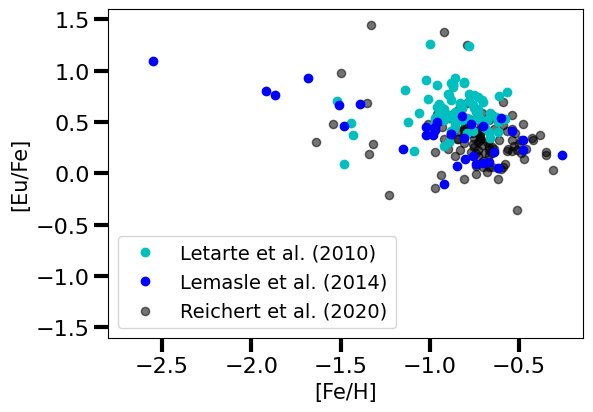

In [6]:
plot_A_ratios("Eu")

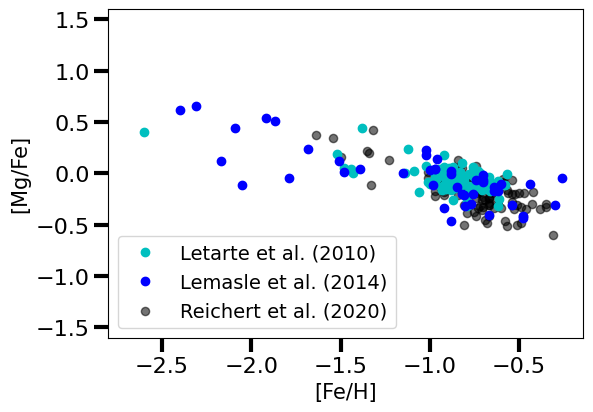

In [7]:
plot_A_ratios("Mg")

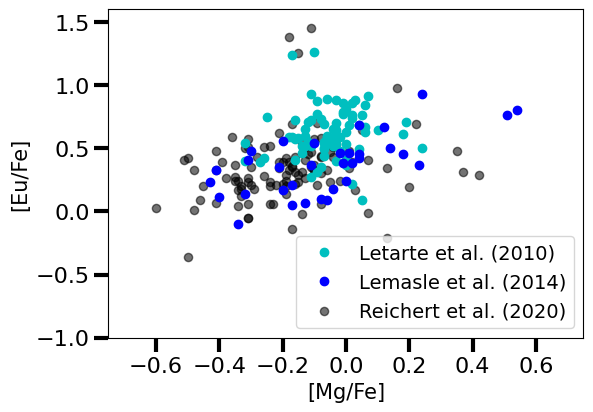

In [8]:
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis='[Mg/Fe]', yaxis=f'[Eu/Fe]')
plt.xlim(-0.75, 0.75)
plt.ylim(-1, 1.6)
plt.scatter(obs_df['[Mg/Fe]'], obs_df['[Eu/Fe]'], s=35, c='black', alpha=0.55, label='Reichert et al. (2020)')
plt.legend()

- What the axes mean  
    - Mg (an alpha element) traces core‑collapse SNe → prompt enrichment that follows star formation.  
    - Eu (mostly r‑process) traces rare/delayed sources (NS‑NS mergers or rare SNe) → timing/rate uncertain.  
    - Eu vs Mg therefore compares relative timescales and rarity of r‑process vs prompt CCSN enrichment.

- Signature motifs and their physical meaning  
    - Strong correlation (Eu rises with Mg): implies a prompt r‑process channel tied to massive stars.  
    - Decoupling (Mg high but Eu low, or Eu rises later): implies delayed r‑process sources (mergers) or low event rates.  
    - Large star‑to‑star scatter at low Mg (or low [Fe/H]): indicates stochastic enrichment from rare events and incomplete mixing in a low‑mass system.  
    - Systematic offset to lower [Mg/Fe] (at fixed [Fe/H]) compared to the Milky Way: indicates a slower/extended star‑formation history and earlier impact of SNe Ia.

- What the Fornax plot typically tells you (based on this dataset and common results)  
    - Fornax shows lower [Mg/Fe] than the Milky Way at the same [Fe/H] (alpha knee shifted to lower metallicity) → extended SFH, SNe Ia reduce alpha earlier.  
    - Eu in Fornax tends to rise later and/or shows larger scatter at low metallicity than MW → r‑process enrichment is relatively delayed or rarer (consistent with NS‑merger dominated r‑process or low overall merger rate).  
    - At higher metallicity Fornax may show increased s‑process signatures (Ba, La) from AGBs; Eu (r‑process) behavior remains sensitive to r‑process channels and their DTDs.

- How this differs from the Milky Way and other dwarfs  
    - Milky Way: faster early SF → higher alpha plateau, less stochastic scatter, and smoother Eu enrichment if a prompt channel contributes.  
    - Lower‑mass dwarfs: often show even larger scatter and more extreme stochastic signatures because of smaller gas reservoirs and fewer r‑process events. Fornax (more massive than many dSphs) is intermediate: smoother than ultra‑faint dwarfs but distinct from MW because of its extended SFH and gas flows.

- Implications for modelling / next checks (practical)  
    - The one‑zone smooth GCE you ran underpredicts early Eu rise — test: add a prompt r‑process channel, shorten DTDs, or include multiple r‑process channels.  
    - Run stochastic / inhomogeneous enrichment models (or Monte‑Carlo injections) to reproduce early‑time scatter.  
    - Overplot a Milky Way comparison sample and compute [Eu/Mg] vs [Fe/H] to isolate relative timing more clearly.  
    - Explore time‑dependent mass_loading and bursty SFH effects.

Short summary: Fornax’s Eu vs Mg pattern points to an extended star‑formation history plus delayed/rare r‑process enrichment (hence later Eu rise and larger low‑metallicity scatter) — different from the MW’s faster, smoother enrichment, and less extreme than the smallest dwarf galaxies.

## Fit Stellar Abundances with Models

In [9]:
# Define the galactic chemical evolution (GCE) parameters

# Dimensionless star formation efficiency (must be below 1.0)
# Original value --> 0.3
sfe = 0.3          

# Strength of galactic outflows (how much gas is removed from the galaxy)
# Original value --> 2.0
mass_loading = 2.0   

# Number of Type Ia supernova that occurs per stellar mass formed
# Original value --> 0.4e-3
nb_1a_per_m = 0.4e-3

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA
o_1 = omega.omega(galaxy=galaxy, SF_law=True, sfe=sfe, mass_loading=mass_loading, \
                  nb_1a_per_m=nb_1a_per_m, transitionmass=10.0)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.59s


(-3.2, 0.2)

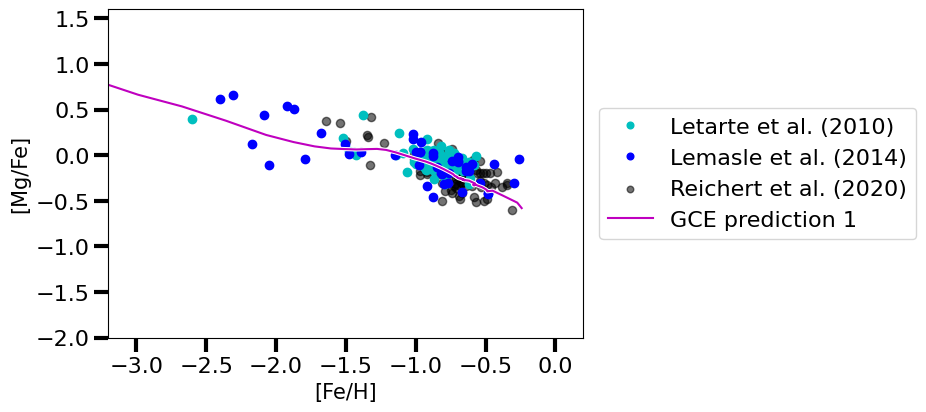

In [13]:
# Choose your elemental abundance ratios
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot stellar abundances derived from observations
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)
plt.scatter(obs_df['[Fe/H]'], obs_df['[Mg/Fe]'], s=35, c='black', alpha=0.55, label='Reichert et al. (2020)')

# Overplot the predictions on top of observations
xy_0_1 = o_1.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='w', linewidth=3.0)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='m', linewidth=1.5, label='GCE prediction 1')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=16)
plt.ylim(-2, 1.6)
plt.xlim(-3.2, 0.2)

(-0.7, 0.5)

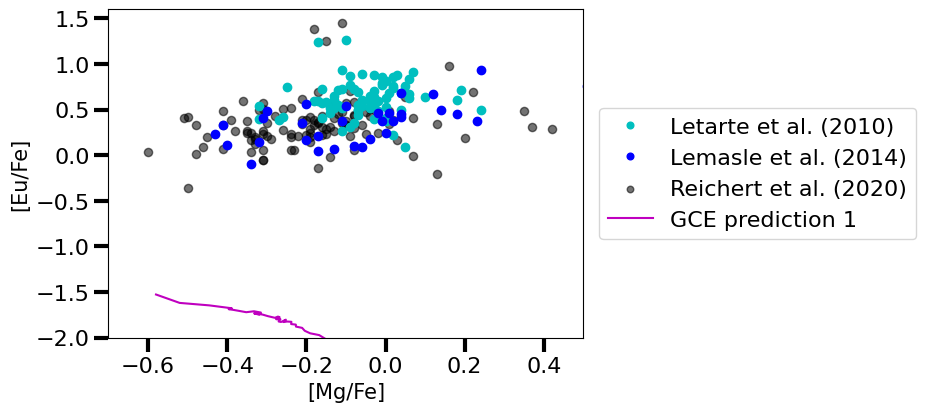

In [15]:
# Choose your elemental abundance ratios
xaxis = '[Mg/Fe]'
yaxis = '[Eu/Fe]'

# Plot stellar abundances derived from observations
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)
plt.scatter(obs_df['[Mg/Fe]'], obs_df['[Eu/Fe]'], s=35, c='black', alpha=0.55, label='Reichert et al. (2020)')

# Overplot the predictions on top of observations
xy_0_1 = o_1.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='w', linewidth=3.0)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='m', linewidth=1.5, label='GCE prediction 1')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=16)
plt.ylim(-2, 1.6)
plt.xlim(-0.7, 0.5)

Prediction is not universal across different elements, e.g. above works well for Mg but not for e.g. Ba, Eu. 

- Different elements come from different nucleosynthetic sites with different timescales and rates. Mg is an alpha element produced rapidly and copiously by core-collapse SNe, so its evolution closely traces the star-formation history and is relatively easy to match with smooth one‑zone models.
- Eu and many heavy elements are produced by rare, delayed events (e.g., neutron-star mergers) or by AGB stars (s‑process). Their yields, event rates and delay‑time distributions are uncertain and can be very stochastic in low‑mass systems, so the same global GCE parameters that fit Mg need not reproduce Eu/Ba.
- Model assumptions matter: nucleosynthetic yield sets, whether r‑process sites are included, delay-time distributions (DTDs) for SNe Ia/mergers, instantaneous mixing vs. stochastic/local enrichment, and outflow/inflow prescriptions all change [X/Fe] tracks differently for different elements.

In [16]:
# Define the galactic chemical evolution (GCE) parameters

# Dimensionless star formation efficiency (must be below 1.0)
# Original value --> 0.3
sfe = 0.99         

# Strength of galactic outflows
# Original value --> 2.0
mass_loading = 0.01

# Number of Type Ia supernova that occurs per stellar mass formed
# Original value --> 0.4e-3
nb_1a_per_m = 0.01e-3

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA
o_2 = omega.omega(galaxy=galaxy, SF_law=True, sfe=sfe, mass_loading=mass_loading, \
                  nb_1a_per_m=nb_1a_per_m, transitionmass=10.0)

OMEGA run in progress..
..Time refinement..
Warning - Negative inflow.  The outflow rate has been increased. 133
Warning - Negative inflow.  The outflow rate has been increased. 134
Warning - Negative inflow.  The outflow rate has been increased. 135
Warning - Negative inflow.  The outflow rate has been increased. 136
   OMEGA run completed - Run time: 2.24s


(-3.2, 0.2)

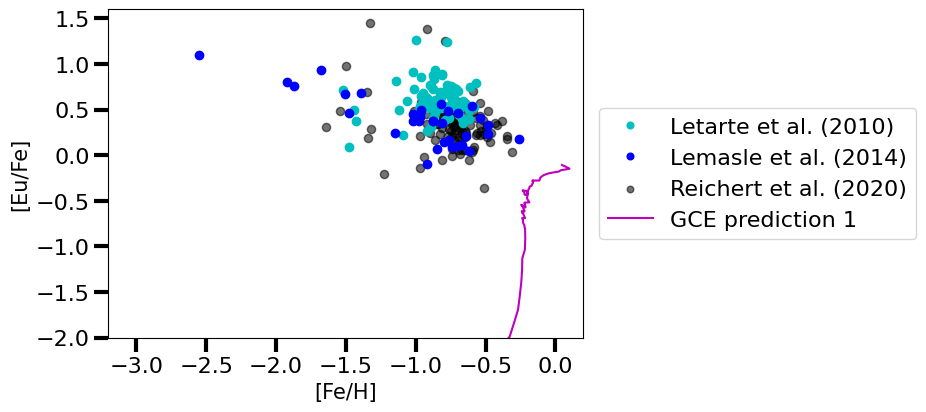

In [17]:
# Choose your elemental abundance ratios
yaxis = '[Eu/Fe]'
xaxis = '[Fe/H]'

# Plot stellar abundances derived from observations
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)
plt.scatter(obs_df['[Fe/H]'], obs_df['[Eu/Fe]'], s=35, c='black', alpha=0.55, label='Reichert et al. (2020)')

# Overplot the predictions on top of observations
xy_0_1 = o_2.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='w', linewidth=3.0)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='m', linewidth=1.5, label='GCE prediction 1')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=16)
plt.ylim(-2, 1.6)
plt.xlim(-3.2, 0.2)

(-0.7, 0.5)

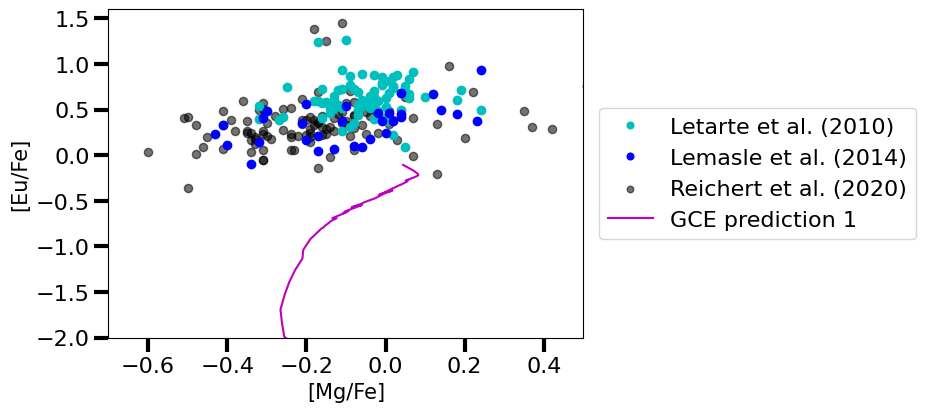

In [18]:
# Choose your elemental abundance ratios
xaxis = '[Mg/Fe]'
yaxis = '[Eu/Fe]'

# Plot stellar abundances derived from observations
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)
plt.scatter(obs_df['[Mg/Fe]'], obs_df['[Eu/Fe]'], s=35, c='black', alpha=0.55, label='Reichert et al. (2020)')

# Overplot the predictions on top of observations
xy_0_1 = o_2.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='w', linewidth=3.0)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='m', linewidth=1.5, label='GCE prediction 1')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=16)
plt.ylim(-2, 1.6)
plt.xlim(-0.7, 0.5)

Currently, the prediction increases only up to ~0 in [Eu/Fe] at the end of the simulation. It should increase earlier and more, but not possible to do so with current configuration, this shows that GCE needs:

- Shorter/modified DTDs or a prompt component for some r‑process sources to produce earlier Eu enrichment.
- Metallicity‑dependent yields and alternative yield sets for massive stars, AGBs and r‑process sites.
- Explicit AGB (s‑process) contributions with realistic delay times to separate r‑ and s‑process evolution.
- Multiple r‑process channels (NS‑NS mergers, NS‑BH, magnetorotational/jet SNe, collapsars) with separate yields, rates and delay‑time distributions (DTDs).

and, possibly:
- Inhomogeneous / non‑instantaneous mixing (multi‑zone or sub‑grid mixing length) instead of one‑zone instantaneous mixing.
- Stochastic, discrete enrichment events (Monte‑Carlo injections) for rare r‑process sources so early-time scatter and sporadic enrichments are captured.
- Time‑dependent, bursty star‑formation histories and variable inflow/outflow prescriptions (mass_loading as a function of time or mass).
- Parameter uncertainties: run ensembles to explore parameter space (mass_loading, sfe, nb_1a_per_m, yields, DTDs) and derive confidence bands.